<a href="https://colab.research.google.com/github/SayleeSabde/NN_Mini_Projects/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handwritten Digits Classification**                                                          :-\
Images of digits are  represented by a grid of n*n dim and that n*n dim grid is flattened and which results in having n*n neurons at input layer.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [6]:
x_train[0].shape  #each sample is 28*28 pixel image

(28, 28)

In [7]:
x_train[0]   #2d representation of sample

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [23]:
#Values needs to be scaled. i.e. values should be 0-1. Highest no. in above grid is 255. so divide it by 255
x_train=x_train/255
x_test=x_test/255

In [24]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

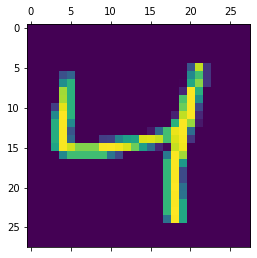

In [25]:
plt.matshow(x_train[2])   #to view sample data

In [26]:
y_train.shape

(60000,)

In [27]:
y_train[:5]    #sample 5 values from y_train

array([5, 0, 4, 1, 9], dtype=uint8)

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
x_train_flattened = x_train.reshape(len(x_train),28*28)    #in reshape, we want (60000.784) bcz 28828=784
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [30]:
x_train_flattened[0]   #now 2d representation of sample is converted to 1d representation


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4736 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3044 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2841 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2668 - accuracy: 0.9258


In [32]:
model.evaluate(x_test_flattened,y_test)  #loss=26% acc = 92%

313/313 [==============================] - 0s 1ms/step - loss: 0.2685 - accuracy: 0.9246


[0.2685016989707947, 0.9246000051498413]

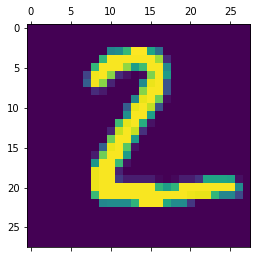

In [43]:
plt.matshow(x_test[1])    #checkinf wwhat is the first img from the test data

In [37]:
y_predict= model.predict(x_test_flattened)

In [41]:
y_predict[1]   #so to know which digit it is, we need to use max on this array

array([4.7907755e-01, 4.1406453e-03, 9.9955326e-01, 4.1454005e-01,
       7.0226136e-10, 8.5235000e-01, 9.1584933e-01, 1.1080329e-12,
       1.7848331e-01, 3.2128835e-09], dtype=float32)

In [42]:
np.argmax(y_predict[1])   #printed index of max value and it is 7 :)

2

In [45]:
y_predicted_labels = [np.argmax(i) for i in y_predict]

In [46]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)   #we cant pass y_precticted in predictions bcz it is not according to y_test format.
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    8,    3,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    7,  928,   18,    8,    1,   13,   11,   39,    4],
       [   1,    0,   18,  938,    0,   11,    2,   13,   21,    6],
       [   1,    1,    2,    1,  914,    0,   13,    5,   10,   35],
       [   8,    2,    5,   51,   12,  746,   18,    9,   34,    7],
       [   8,    3,    6,    1,    7,    9,  920,    2,    2,    0],
       [   1,    6,   21,    9,    3,    0,    0,  962,    2,   24],
       [   5,    8,    7,   32,    9,   24,   10,   13,  860,    6],
       [   9,    7,    2,   11,   26,    5,    0,   34,    8,  907]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

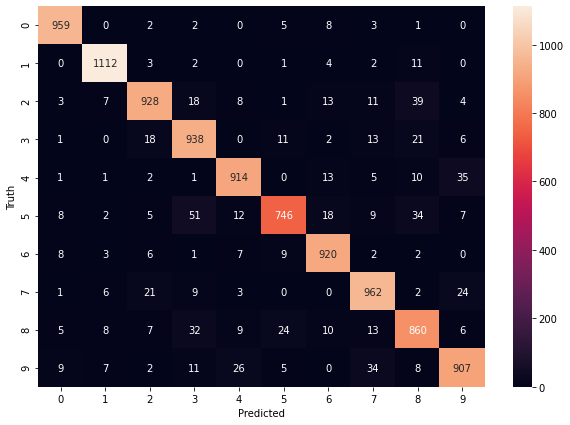

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Confusion Matrix tells 959 times 1 is predicted as 1.. 3 times 1 is predicted as 2 etc.

Adding hidden layer to existing Network

In [48]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2742 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1263 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0690 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0539 - accuracy: 0.9834


In [49]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0837 - accuracy: 0.9747


[0.08369312435388565, 0.9746999740600586]

In [50]:
y_predict= model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predict]

In [51]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)   #we cant pass y_precticted in predictions bcz it is not according to y_test format.
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    0,    0,    1,    1,    2,    1,    3,    0],
       [   0, 1123,    3,    1,    0,    2,    2,    0,    4,    0],
       [   6,    1, 1005,    3,    3,    0,    4,    2,    8,    0],
       [   0,    0,    8,  985,    1,    2,    0,    3,    3,    8],
       [   1,    0,    3,    1,  959,    0,    7,    0,    0,   11],
       [   4,    0,    3,   14,    1,  853,    5,    2,    5,    5],
       [   6,    2,    3,    0,    3,    4,  940,    0,    0,    0],
       [   2,    4,   11,    5,    0,    0,    0,  989,    1,   16],
       [   4,    0,    9,    4,    5,    4,    2,    4,  937,    5],
       [   5,    2,    0,    4,    7,    2,    1,    2,    2,  984]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

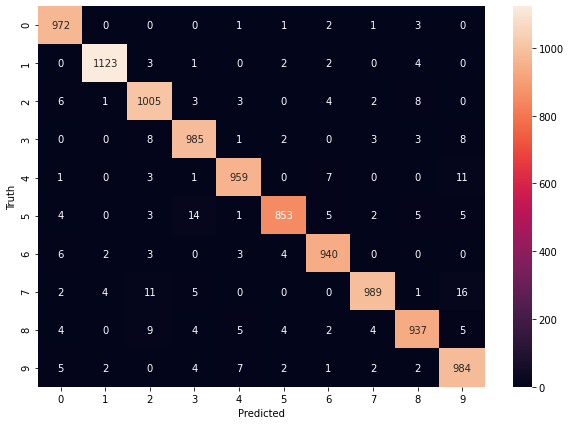

In [52]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Keras Flatten layer implementation

In [54]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2807 - accuracy: 0.9197
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1260 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0886 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0689 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0551 - accuracy: 0.9833


In [55]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0818 - accuracy: 0.9740


[0.08180879056453705, 0.9739999771118164]